## Comparing Classification Models

In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on dataset and goals, the importance of these considerations will vary from project to project.This notebook will review Logistic Regression, Decision Trees, KNN, and SVM models and discuss the pros and cons of each.  Two example datasets are used to offer two very different tasks where interpretability of the model may be of differing importance.


### Part 1: Predicting Churn with Imbalanced Target Data

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  The notebook will consider interpretability, imbalnced classes, and the speed of training.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#Load the data
churn = pd.read_csv(r'C:\Users\agnek\OneDrive\Documents\Educational_Training Materials\Berkeley Haas\Codio\Module16\telecom_churn.csv')

In [5]:
#churn data
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Class counts:
 False    2850
True      483
Name: Churn, dtype: int64


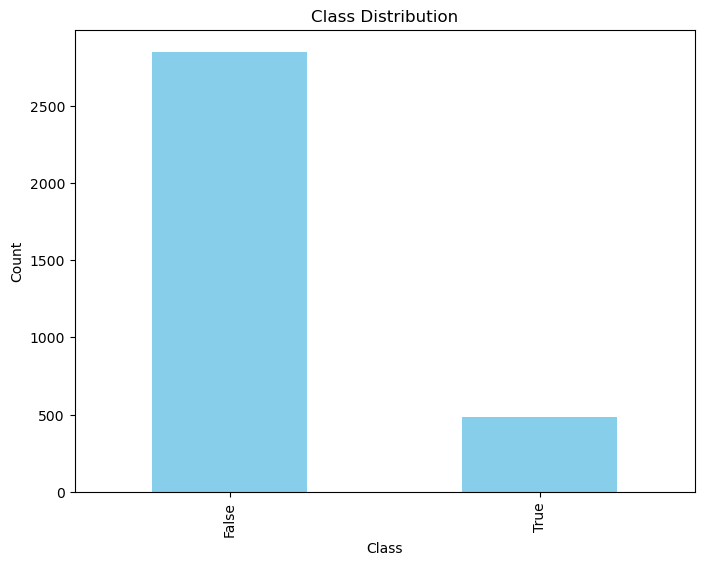

Class proportions:
 False    0.855086
True     0.144914
Name: Churn, dtype: float64


In [8]:
# Examine the target variable
class_counts = churn['Churn'].value_counts()
print("Class counts:\n", class_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Calculate class proportions
class_proportions = churn['Churn'].value_counts(normalize=True)
print("Class proportions:\n", class_proportions)

In [7]:
column_names_list = churn.columns.tolist()
print(column_names_list)

['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [9]:
# Convert Churn column from True/False to 1/0
churn['Churn'] = churn['Churn'].astype(int)

In [13]:
# Define the binary columns
binary_columns = ['International plan', 'Voice mail plan']

# Convert binary Yes/No columns to binary 0/1
churn[binary_columns] = churn[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode non-binary string columns
non_binary_string_columns = ['State', 'Area code']
churn_encoded = pd.get_dummies(churn, columns=non_binary_string_columns)

# Display the DataFrame
churn_encoded.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510
0,128,0,0,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,0,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,0,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,0,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# Split the data into training and testing sets
X = churn_encoded.drop('Churn', axis=1)
y = churn_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
# Standardize the features for KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [17]:
# Run Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42) #class_weight='balanced': This parameter adjusts the 
#weights of the classes inversely proportional to their frequencies, which helps in dealing with imbalanced classes.
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.66      0.77       855
           1       0.25      0.67      0.36       145

    accuracy                           0.66      1000
   macro avg       0.59      0.66      0.57      1000
weighted avg       0.82      0.66      0.71      1000

[[564 291]
 [ 48  97]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Analysis:
Logistic Regression has a moderate overall accuracy of 66%, but the precision for the churn class (class 1) is very low at 25%. While it captures 67% of churn cases (recall), its ability to accurately identify non-churn cases is only moderate.

### Decision Tree

In [18]:
# Run Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

Decision Tree:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       855
           1       0.47      0.54      0.50       145

    accuracy                           0.84      1000
   macro avg       0.70      0.72      0.71      1000
weighted avg       0.86      0.84      0.85      1000

[[766  89]
 [ 66  79]]


#### Analysis

The Decision Tree has a higher accuracy (84%) and better precision and recall for the churn class compared to Logistic Regression. It has a good balance between precision and recall, but the performance for the churn class (class 1) is still moderate.

### KNN

In [19]:
# Run K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("K-Nearest Neighbors:\n", classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       855
           1       0.53      0.06      0.11       145

    accuracy                           0.86      1000
   macro avg       0.70      0.53      0.52      1000
weighted avg       0.81      0.86      0.80      1000

[[847   8]
 [136   9]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Analysis

KNN has a high overall accuracy (86%), but it performs poorly on the churn class, with very low recall (0.06) and F1-score (0.11). It is extremely biased towards the majority class (not churned).

### Support Vector Machine

In [20]:
# Run Support Vector Machine
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print("Support Vector Machine:\n", classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))

Support Vector Machine:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       855
           1       0.35      0.58      0.44       145

    accuracy                           0.79      1000
   macro avg       0.64      0.70      0.65      1000
weighted avg       0.84      0.79      0.80      1000

[[701 154]
 [ 61  84]]


#### Analysis

SVM has an accuracy of 79% and strikes a balance between precision and recall for the churn class, although the precision for the churn class is still relatively low (0.35). It shows better performance on class 1 compared to KNN and Logistic Regression.

### Conclusion

Decision Tree is the best model in this case due to its higher overall accuracy (84%), balanced precision, and recall for the churn class. It provides a good trade-off between handling imbalanced classes, interpretability, and speed of training.

### Further Discussion of Classification Models

1. Logistic Regression

#### Pros:

Interpretable Results: Logistic Regression provides coefficients for each feature, making it easy to interpret the impact of each feature on the prediction.

Speed of Training: It trains relatively quickly even on large datasets.

Handling Imbalanced Classes: Logistic Regression can be modified to handle imbalanced classes by using class weights or threshold tuning.

#### Cons:

Non-linear Relationships: It struggles with capturing non-linear relationships unless features are transformed.
Performance: May not perform as well as more complex models on certain datasets.

2. Decision Trees

#### Pros:

Interpretable Results: Decision Trees are highly interpretable as the decision-making process can be visualized.

Speed of Training: Generally quick to train and easy to understand.

Handling Imbalanced Classes: Can handle imbalanced classes using techniques like class weights, although not inherently designed for it.

#### Cons:

Overfitting: Prone to overfitting, especially with deep trees.

Instability: Small changes in data can result in very different trees.

3. K-Nearest Neighbors (KNN)

#### Pros:

Simplicity: Simple to understand and implement.

No Training Time: As a lazy learner, it has no training phase, only a prediction phase.

#### Cons:

Handling Imbalanced Classes: Poor at handling imbalanced classes, as the majority class can dominate the predictions.

Speed of Prediction: Slow prediction time, especially with large datasets.

Interpretability: Not very interpretable as it’s hard to understand why a particular prediction was made.

4. Support Vector Machines (SVM)

#### Pros:

Performance: Effective in high-dimensional spaces and works well with clear margin of separation.

Handling Imbalanced Classes: Can handle imbalanced classes by adjusting the class weights.

#### Cons:

Interpretability: Less interpretable compared to Logistic Regression and Decision Trees.

Speed of Training: Training can be slow, especially with large datasets.

Memory Usage: Can be quite memory-intensive.

### Part 2: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which classifier would you use here and why?  Again, consider the balance of classes, speed of training, and importance of interpretability.



In the context of recognizing handwritten digits, we typically deal with balanced classes (each digit from 0 to 9 should ideally have similar representation). The dataset used for this task is often the MNIST dataset, which contains 60,000 training images and 10,000 testing images.

In [21]:
#Import essential libraries if havent done so before
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Load the digits dataset
digits = datasets.load_digits()

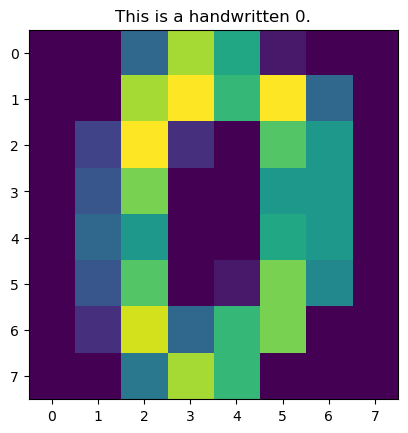

In [5]:
#Example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');

In [ ]:
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#### Code Overview

In the context of image processing and machine learning, "flattening the images" refers to the process of converting a multi-dimensional array representing an image into a one-dimensional array (vector). This transformation is often necessary because many machine learning algorithms require input data to be in a flat, tabular format rather than in a multi-dimensional format.

digits.images: 
This attribute of the dataset is a 3D array where each image is a 2D array of pixel values.

len(digits.images): 
This computes the number of samples (images) in the dataset and stores it in the variable n_samples.

digits.images: 
This is a 3D array of shape (n_samples, height, width).

reshape((n_samples, -1)): 
The reshape method is used to transform the 3D array into a 2D array. Here, -1 is a placeholder that tells NumPy to infer the size of the second dimension based on the number of samples and the total number of elements. This effectively flattens each 2D image (of shape (height, width)) into a 1D array (vector) of length height * width.

The resulting data will be a 2D array of shape (n_samples, height * width), where each row represents a flattened image

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

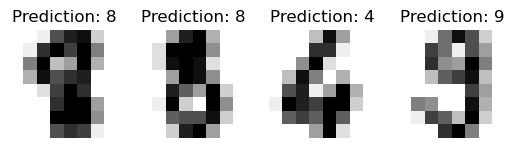

In [22]:

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001, kernel='rbf')

# We learn the digits on the train subset
classifier.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = classifier.predict(X_test)

# Print classification report
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

# Print confusion matrix
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

# Plot some of the test images with their predicted values
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

### Discussion of SVC Results
#### Classification Report
Precision: The precision for most classes is very high, with values close to or at 1.00. This indicates that the SVM classifier makes very few false positive predictions across the board.

Recall: Recall values are also very high, with the lowest being 0.87 for class 3. This suggests that the classifier is effectively identifying the majority of actual positive cases for each class.

F1-Score: The F1-scores, which are the harmonic mean of precision and recall, are also very high, indicating a balanced performance. The lowest F1-score is 0.92 for class 3.

Accuracy: The overall accuracy of the classifier is 0.97, which is excellent.

Macro Average and Weighted Average: Both the macro average and weighted average precision, recall, and F1-score are 0.97, showing consistent performance across all classes.

#### Confusion Matrix
True Positives: The diagonal elements of the confusion matrix represent true positives for each class. Most values are very high, showing that the classifier correctly predicts the majority of instances.

False Positives and False Negatives: There are very few false positives and false negatives. Class 3 has some confusion with classes 5 and 7, indicating occasional misclassification among these classes.

#### Conclusion
The SVC model with gamma=0.001 performs exceptionally well on the handwritten digit recognition task, with high precision, recall, and F1-scores across all classes. The overall accuracy is 97%, and the model shows consistent performance as indicated by the macro and weighted averages. While there are minor misclassifications, particularly for class 3, the model's performance is robust and suitable for this task.

### Further Discussion of Classification Models

When choosing a classifier, we need to consider the balance of classes, speed of training, and importance of interpretability.

1. Logistic Regression

#### Pros:

Interpretable Results: Logistic Regression provides coefficients for each feature, making it easy to interpret the impact of each feature on the prediction.

Speed of Training: It trains relatively quickly even on large datasets.

#### Cons:

Handling Imbalanced Classes: Logistic Regression can struggle with imbalanced classes unless modified with class weights.

Non-linear Relationships: It struggles with capturing non-linear relationships unless features are transformed.

Logistic Regression is typically not the best choice for image recognition tasks due to its linear nature and limited ability to capture complex patterns

2. Decision Trees

#### Pros:

Interpretable Results: Decision Trees are highly interpretable as the decision-making process can be visualized.

Speed of Training: Generally quick to train and easy to understand.

#### Cons:

Handling Imbalanced Classes: Can handle imbalanced classes using techniques like class weights, although not inherently designed for it.

Overfitting: Prone to overfitting, especially with deep trees.

Instability: Small changes in data can result in very different trees.

Applicability: While interpretable and quick to train, Decision Trees can overfit and may not capture the complexity needed for image recognition tasks effectively

3. K-Nearest Neighbors (KNN)

#### Pros:

Simplicity: Simple to understand and implement.

No Training Time: As a lazy learner, it has no training phase, only a prediction phase.

#### Cons:

Handling Imbalanced Classes: Poor at handling imbalanced classes, as the majority class can dominate the predictions.

Speed of Prediction: Slow prediction time, especially with large datasets.

Interpretability: Not very interpretable as it’s hard to understand why a particular prediction was made.

Applicability: KNN can work well for small-scale image recognition tasks but becomes impractical for large datasets due to slow prediction times

4. Support Vector Machines (SVM)

#### Pros:

Performance: Effective in high-dimensional spaces and works well with clear margin of separation.

Handling Imbalanced Classes: Can handle imbalanced classes by adjusting the class weights.

#### Cons:

Interpretability: Less interpretable compared to Logistic Regression and Decision Trees.

Speed of Training: Training can be slow, especially with large datasets.

Memory Usage: Can be quite memory-intensive.

Applicability: SVMs, particularly with non-linear kernels (like RBF), are well-suited for image recognition tasks due to their ability to handle high-dimensional data effectively.